# Random Forest Classifier
An ensembler that uses a group of decision trees to cancel out noise, stabilize predictions and improve accuracy.

In [5]:
# Load and explore dataset
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


- random_state ensures consistent result when rerunned.

In [9]:
# Split the data
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

- n_estimators=100 : the forest grows 100 decision trees

In [8]:
# Train the model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Test the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}\n')
print(f'Confusion Matrix: \n{confusion}\n')
print(f'Classification Report: \n{report}')

Accuracy: 1.0

Confusion Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



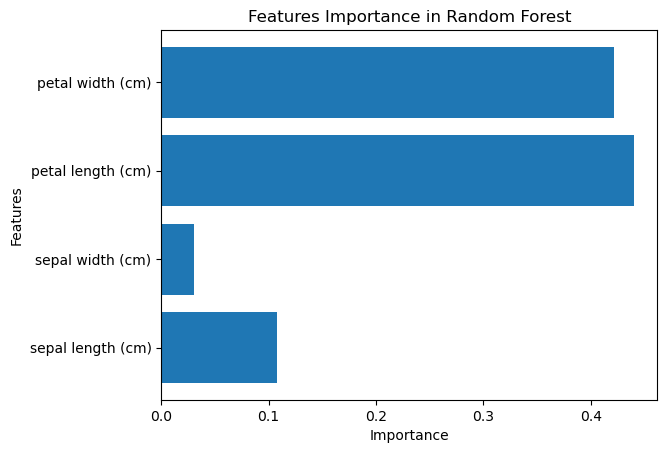

In [21]:
# Checking feature importance
import matplotlib.pyplot as plt

importances = rfc.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Features Importance in Random Forest')
plt.show()

### Predictions from a few trees

In [23]:
for i, tree in enumerate(rfc.estimators_[:5]):
    print(f'Tree {i+1} prediction: {tree.predict([X_test.iloc[0]])}')
print(f'\nFinal Random Forest prediction: {rfc.predict([X_test.iloc[0]])}')

Tree 1 prediction: [1.]
Tree 2 prediction: [1.]
Tree 3 prediction: [1.]
Tree 4 prediction: [2.]
Tree 5 prediction: [1.]

Final Random Forest prediction: [1]


C:\Users\GARDAS AKASH\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
